<a href="https://colab.research.google.com/github/nhanguyene/HOMEWORK_ARTIFICIAL_INTELLIGIENT/blob/main/Homework_Arm_3dofs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data from PC
from google.colab import files 
uploaded=files.upload()

Saving Data_Arm_3_dofs.csv to Data_Arm_3_dofs.csv


In [2]:
import keras
from keras.datasets import boston_housing
from tensorflow.keras.optimizers import RMSprop  # tính sai số.
from keras.callbacks import EarlyStopping  # Dừng nhanh, khi đạt 1 giá trị nào đó thì dừng xử lý.
from sklearn import preprocessing
from sklearn.preprocessing import scale, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


In [4]:
#Get data from colab
url ='Data_Arm_3_dofs.csv'
dataframe=pd.read_csv(url)

In [40]:
#Separate data into different column
theta=dataframe.drop(['px','py','phi'], axis=1)
position=dataframe.drop(['theta1','theta2','theta3'], axis=1)
theta_train,theta_test,position_train,position_test=train_test_split(theta,position,test_size=0.2)
theta=theta.astype('float32')

In [41]:
#Create model, training
model = Sequential()
model.add(Dense(64, kernel_initializer='normal', activation='relu', input_shape=(3,)))
model.add(Dense(64, activation='relu'))  # layer ẩn có 64 input, 64 output.

model.add(Dense(3))  # layer output có 1 noron (1 output) là giá nhà.
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                256       
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,611
Trainable params: 4,611
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
22/22 [==============================] - 1s 13ms/step - loss: 92.6325 - accuracy: 0.9284 - val_loss: 100.1988 - val_accuracy: 1.0000
Epoch 2/1000
22/22 [==============================] - 0s 8ms/step - loss: 43.3759 - accuracy: 0.9674 - val_loss: 25.2357 - val_accuracy: 1.0000
Epoch 3/1000
22/22 [==============================] - 0s 7ms/step - loss: 18.6307 - accuracy: 0.9674 - val_loss: 25.1044 - val_accuracy: 1.0000
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 17.2293 - accuracy: 0.9674 - val_loss: 27.5325 - val_accuracy: 1.0000
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 16.6366 - accuracy: 0.9674 - val_loss: 27.4514 - val_accuracy: 1.0000
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 16.3349 - accuracy: 0.9674 - val_loss: 28.6526 - val_accuracy: 1.0000
Epoch 7/1000
22/22 [==============================] - 0s 5ms/step - loss: 16.1208 - accuracy: 0.9674 - val_loss: 29.8048 - val_accurac

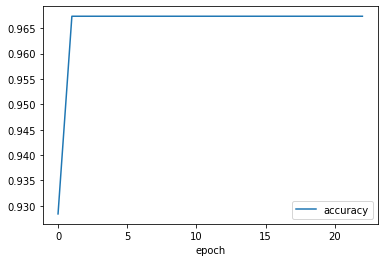

In [42]:
#Compile, Training and Checking
model.compile(loss='mae', optimizer=RMSprop(), metrics=['accuracy'])
history=model.fit(theta,position,batch_size=256, epochs=1000, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])
score = model.evaluate(theta,position, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

ylim=(0,1)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')

plt.legend(['accuracy'])
plt.show()

In [45]:
#Prediction and Result
theta_test=np.array(theta_test)
print(theta_test[720])
pos_predict = model.predict(theta_test[720].reshape(1,3))
print("Position Predicted: ",pos_predict)
position_test=np.array(position_test)
print("Real Position: ",position_test[720])

[110  20  80]
Position Predicted:  [[-60.889034  40.753742 204.7234  ]]
Real Position:  [-60.13301963  67.62640876 210.        ]
